<h1 color='4B0082'>Challenge 2</h1>
<h2 color='#CEA2FD'>Fuzzy control design</h2>
<h3 color='#F8C8DC'>Made by Julián B. Sánchez López</h3>

In [16]:
from fuzzy import *

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [17]:
# Range of ages (from 18 to 75 years old)
age_universe_discourse = np.arange(18, 76, 1)

# Range of vehicle usage (from 0% to 100%)
vehicle_usage_universe_discourse = np.arange(0, 101, 1)

# Range of financial risk (from 0% to 100%)
financial_risk_universe_discourse = np.arange(0, 101, 1)

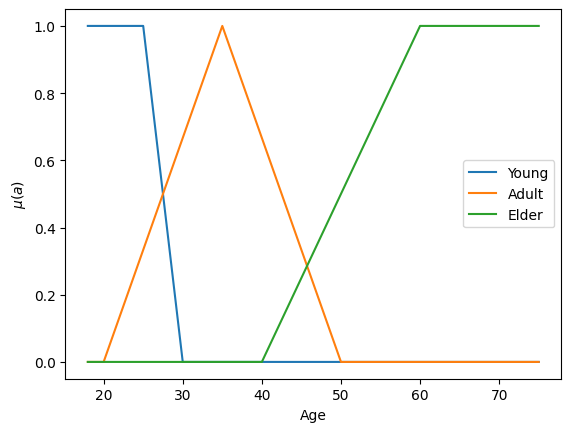

In [18]:
# Membership function for age
age_membership_young = trapmf(age_universe_discourse, [18, 18, 25, 30])
age_membership_adult = trimf(age_universe_discourse, [20, 35, 50])
age_membership_elder = trapmf(age_universe_discourse, [40, 60, 75, 75])

# Graphs for age
plt.plot(age_universe_discourse, age_membership_young, label="Young")
plt.plot(age_universe_discourse, age_membership_adult, label="Adult")
plt.plot(age_universe_discourse, age_membership_elder, label="Elder")
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('$\mu (a)$')
plt.show()

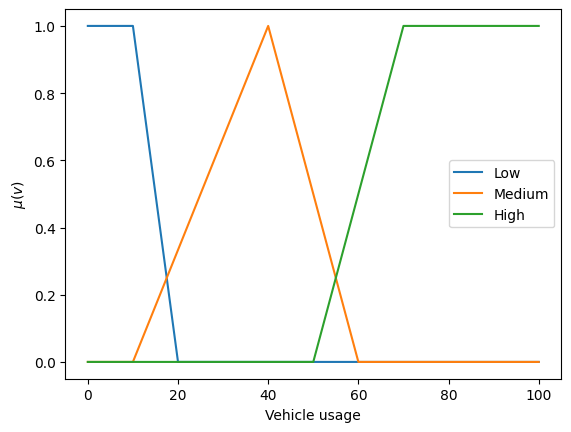

In [19]:
# Membership function for vehicle usage
vehicle_usage_membership_low = trapmf(vehicle_usage_universe_discourse, [0, 0, 10, 20])
vehicle_usage_membership_medium = trimf(vehicle_usage_universe_discourse, [10, 40, 60])
vehicle_usage_membership_high = trapmf(vehicle_usage_universe_discourse, [50, 70, 100, 100])

# Graphs for vehicle usage
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_low, label="Low")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_medium, label="Medium")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_high, label="High")
plt.legend(loc='best')
plt.xlabel('Vehicle usage')
plt.ylabel('$\mu (v)$')
plt.show()

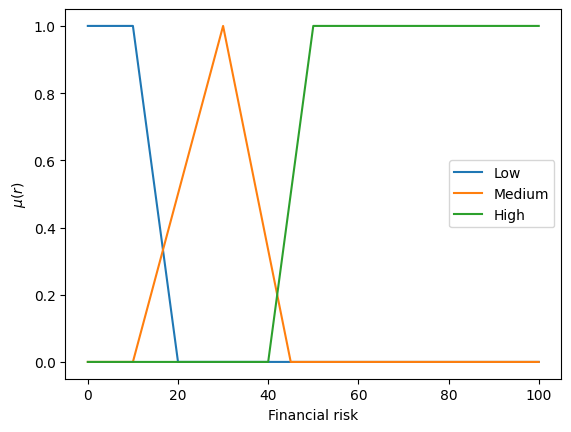

In [20]:
# Membership function for financial risk
financial_risk_membership_low = trapmf(financial_risk_universe_discourse, [0, 0, 10, 20])
financial_risk_membership_medium = trimf(financial_risk_universe_discourse, [10, 30, 45])
financial_risk_membership_high = trapmf(financial_risk_universe_discourse, [40, 50, 100, 100])

# Graphs financial risk
plt.plot(financial_risk_universe_discourse, financial_risk_membership_low, label="Low")
plt.plot(financial_risk_universe_discourse, financial_risk_membership_medium, label="Medium")
plt.plot(financial_risk_universe_discourse, financial_risk_membership_high, label="High")
plt.legend(loc='best')
plt.xlabel('Financial risk')
plt.ylabel('$\mu (r)$')
plt.show()

In [21]:
# Define values for the exercise scenario
# Person with 25 years of age and a 50% usage of the vehicle
age_value = 25
vehicle_usage_value = 50

Young age: 1.0
Adult age: 0.3333333333333333
Elder age 0.0


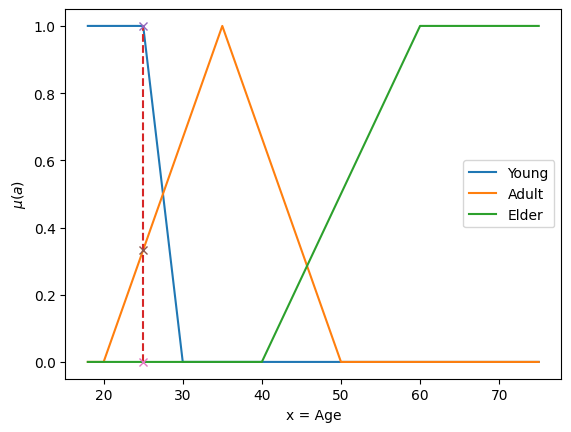

In [22]:
# Calculate the grade of membership for the given value of the variable 'age'
age_value_grade_membership_young = fuzz.interp_membership(age_universe_discourse, age_membership_young, age_value)
age_value_grade_membership_adult = fuzz.interp_membership(age_universe_discourse, age_membership_adult, age_value)
age_value_grade_membership_elder = fuzz.interp_membership(age_universe_discourse, age_membership_elder, age_value)

print("Young age:", age_value_grade_membership_young)
print("Adult age:", age_value_grade_membership_adult)
print("Elder age", age_value_grade_membership_elder)

plt.plot(age_universe_discourse, age_membership_young, label="Young")
plt.plot(age_universe_discourse, age_membership_adult, label="Adult")
plt.plot(age_universe_discourse, age_membership_elder, label="Elder")
plt.plot([age_value, age_value], [0.0, 1.0], linestyle="--")
plt.plot(age_value, age_value_grade_membership_young, 'x')
plt.plot(age_value, age_value_grade_membership_adult, 'x')
plt.plot(age_value, age_value_grade_membership_elder, 'x')
plt.legend(loc='best')
plt.xlabel('x = Age')
plt.ylabel('$\mu (a)$')
plt.show()

Low vehicle usage: 0.0
Medium vehicle usage: 0.5
High vehicle usage 0.0


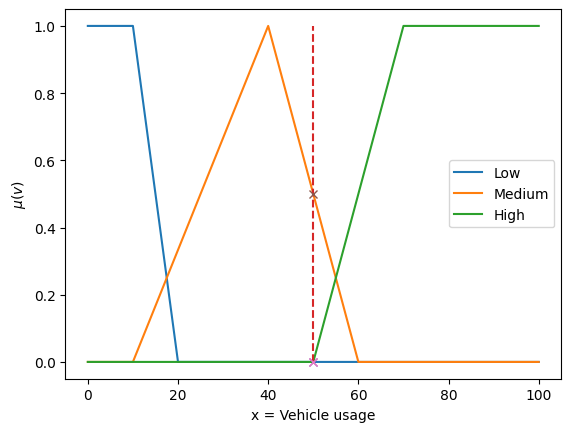

In [23]:
# Calculate the grade of membership for the given value of the variable 'vehicle usage'
vehicle_usage_value_grade_membership_low = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                  vehicle_usage_membership_low,
                                                                  vehicle_usage_value)

vehicle_usage_value_grade_membership_medium = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                     vehicle_usage_membership_medium,
                                                                     vehicle_usage_value)

vehicle_usage_value_grade_membership_high = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                   vehicle_usage_membership_high,
                                                                   vehicle_usage_value)

print("Low vehicle usage:", vehicle_usage_value_grade_membership_low)
print("Medium vehicle usage:", vehicle_usage_value_grade_membership_medium)
print("High vehicle usage", vehicle_usage_value_grade_membership_high)

plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_low, label="Low")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_medium, label="Medium")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_high, label="High")
plt.plot([vehicle_usage_value, vehicle_usage_value], [0.0, 1.0], linestyle="--")
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_low, 'x')
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_medium, 'x')
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_high, 'x')
plt.legend(loc='best')
plt.xlabel('x = Vehicle usage')
plt.ylabel('$\mu (v)$')
plt.show()

In [24]:
# Fuzzification and defuzzification 

In [25]:
# RULE 1: "IF the age is young AND the vehicle usage is medium THEN the financial risk is high"
antecedent_1 = np.fmin(age_value_grade_membership_young, vehicle_usage_value_grade_membership_medium)
rule_1 = np.fmin(antecedent_1, financial_risk_membership_high)

In [26]:
# RULE 2: "IF the age is adult AND the vehicle usage is medium THEN the financial risk is medium"
antecedent_2 = np.fmin(age_value_grade_membership_adult, vehicle_usage_value_grade_membership_medium)
rule_2 = np.fmin(antecedent_2, financial_risk_membership_medium)

In [27]:
# Union of the resulting group given the application of the rules
union = np.fmax(rule_1, rule_2)
print(union)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.1        0.15       0.2        0.25       0.3        0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.26666667
 0.2        0.3        0.4        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5 

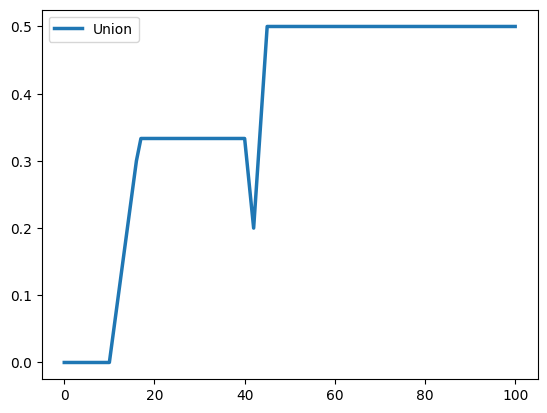

In [28]:
# Graphical representation of the give rule's union
plt.plot(financial_risk_universe_discourse, union, linewidth=2.5, linestyle="-", label="Union")
plt.legend(loc='best')
plt.show()

In [29]:
# Apply defuzzification using different methods in order to obtain the percent of the financial risk
defuzzification_centroid = defuzz(financial_risk_universe_discourse, union, 'centroid')
defuzzification_bisector = defuzz(financial_risk_universe_discourse, union, 'bisector')
defuzzification_mom = defuzz(financial_risk_universe_discourse, union, 'MOM')
defuzzification_som = defuzz(financial_risk_universe_discourse, union, 'SOM')
defuzzification_lom = defuzz(financial_risk_universe_discourse, union, 'LOM')

print(f"Defuzzification with the 'Centroid' method = {defuzzification_centroid}%")
print(f"Defuzzification with the 'Bisector' method = {defuzzification_bisector}%")
print(f"Defuzzification with the 'MOM' method = {defuzzification_mom}%")
print(f"Defuzzification with the 'SOM' method = {defuzzification_som}%")
print(f"Defuzzification with the 'LOM' method = {defuzzification_lom}%")

Defuzzification with the 'Centroid' method = 60.78194505015263%
Defuzzification with the 'Bisector' method = 62%
Defuzzification with the 'MOM' method = 72.5%
Defuzzification with the 'SOM' method = 45%
Defuzzification with the 'LOM' method = 100%


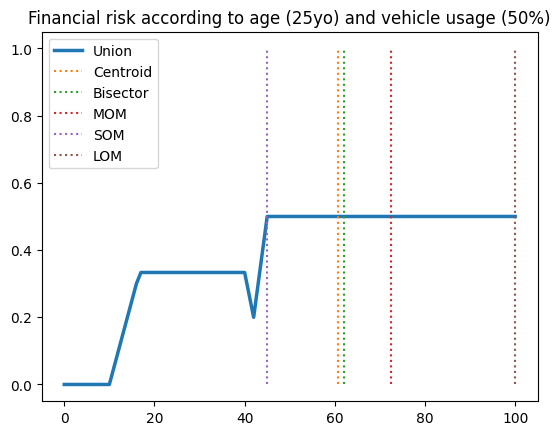

In [30]:
# Graph representation to compare what is the result of applying each method
plt.plot(financial_risk_universe_discourse, union, linewidth=2.5, linestyle="-", label="Union")
plt.plot([defuzzification_centroid, defuzzification_centroid], [0, 1], linestyle=":", label="Centroid")
plt.plot([defuzzification_bisector, defuzzification_bisector], [0, 1], linestyle=":", label="Bisector")
plt.plot([defuzzification_mom, defuzzification_mom], [0, 1], linestyle=":", label="MOM")
plt.plot([defuzzification_som, defuzzification_som], [0, 1], linestyle=":", label="SOM")
plt.plot([defuzzification_lom, defuzzification_lom], [0, 1], linestyle=":", label="LOM")
plt.title(f"Financial risk according to age ({age_value}yo) and vehicle usage ({vehicle_usage_value}%)")
plt.legend(loc='best')
plt.show()

<h2>Result and conclusion</h2>

The fuzzy control system designed is able to find a precise value of what the financial risk percent would be for a person of 25 years of age and a 50% percent vehicle usage.
However, each of the different defuzzification methods return a different answer, so it is important to choose which one fits better.
With the help of the value results given and their graphical representation, it does seem like method 'Centroid' performs the best. There are two main reasons:
 - Considering the input given, the result fits pretty well on what we would expect from the system.
 - When using this same system with different values for the age and vehicle this method also able to yield coherent results.

However, one important thing to consider is that it won't be accurate for older ages or simply because the rule set did not consider them at all. 

<strong>Using the fuzzy control system designed a person of 25 years of age and a vehicle usage of 50% would have a financial risk of <u>60.78%</u><strong>